<a href="https://colab.research.google.com/github/Samuelcarbajal/EDP/blob/main/Ejercicio_1_Carbajal_Mares_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solucion de la ecuacion:


$\dfrac{\partial u}{\partial t}=\dfrac{\partial^{2} u}{\partial x^{2}}$ 

sujeta a las condiciones de frontera:

$u(0,t)=u(1,t)=0, t>0$

y la condicion inicial:

$x(x,0)=2x+1, 0<x<1$

Esta dada en terminos de laserie de Fourier por la expresion:

$u(x,t)=\sum_{n=1}^{\infty} [1-(-1)^{n}3](\dfrac{2}{n \pi})sin(n\pi x)e^{-(n\pi)^{2}t}$


In [28]:
from pylab import *



Empezamos graficando la condicion inicial:

In [29]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

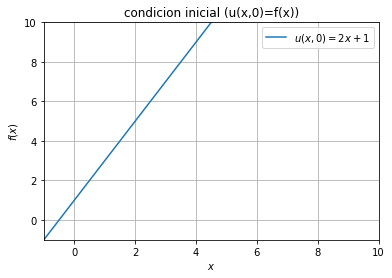

In [30]:
x = linspace(-1,5,1000)
f = 2*recta(x)+1
plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("condicion inicial (u(x,0)=f(x))")
xlim([-1,10]),ylim([-1,10]),grid(),legend()
show()


Usando una serie de fourier para aproximar la condicion inicial $u(x,0)=f(x)=2x+1$

In [10]:
def funcion_0(x,N=15): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-3*(-1)**(n))*sin(n*pi*x)/(n)
    return (2.0/pi)*f

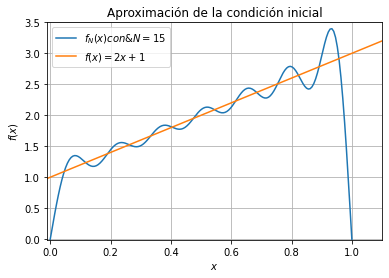

In [13]:
f_n = funcion_0(x)
plot(x,f_n,label='$f_N(x) con &N=15$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.5]),grid(),legend()
show()


Podemos visualizar la aproximación para diferentes cantidades de armónicos.

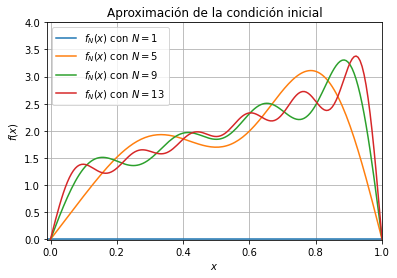

In [17]:
for i in range(1,16,4):
    plot(x,funcion_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1]),ylim([-0.01,4]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, t=0

In [20]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1-3*(-1)**(n))*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [27]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)
     

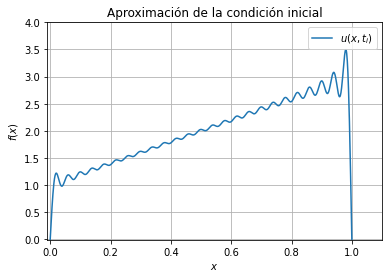

In [24]:
plot(x,U[:,0],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,4]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \rightarrow \infty$

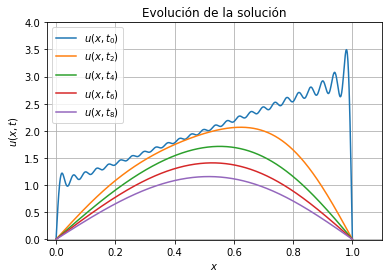

In [26]:
for i in range(0,10,2):
    plot(x,U[:,i],label='$u(x,t_%d)$' %i)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.03,1.1]),ylim([-0.01,4]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

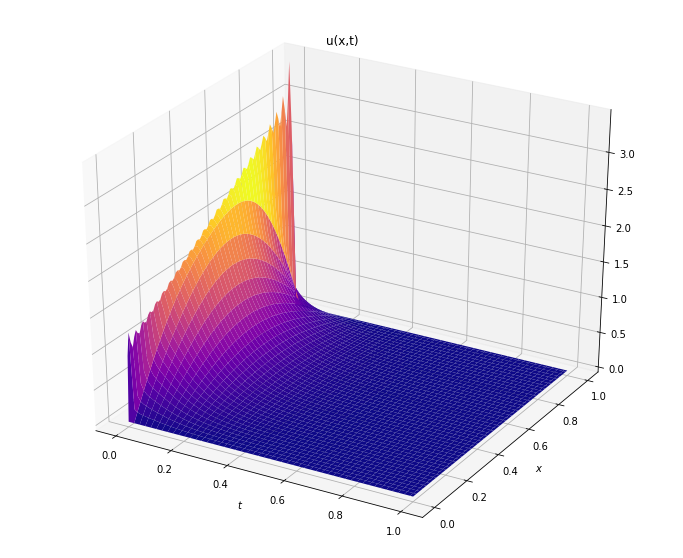

In [34]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma");